# BLIP2 captioning and VQA

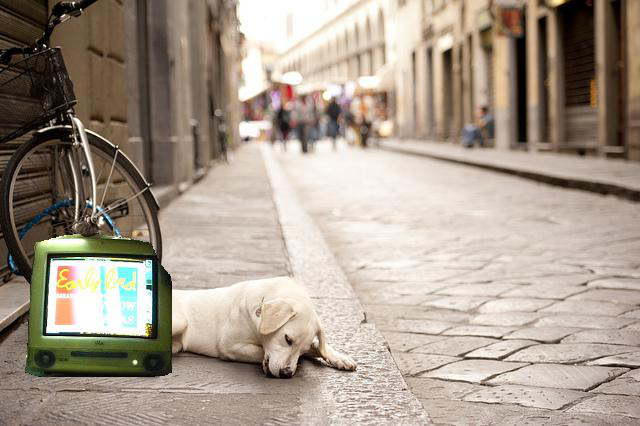

In [9]:

import requests
from PIL import Image



# In context

# image = Image.open('./images/IC/COCO_val2014_000000000143.jpg')  # living room

image = Image.open('/WorkSpace-2/aroy/software/ANSR/MAE-FAR/img_impainted.png')

# Out of context
# image = Image.open('./images/OOC/COCO_val2014_000000000139_var1_14_0.jpg') # dog and laptop
# image = Image.open('./images/OOC/COCO_val2014_000000000139_var1_149_0.jpg') # elephant in the room
image = Image.open('./images/OOC/COCO_val2014_000000000074_var3_408_4.jpg') # bear in the room
# image = Image.open('./images/OOC/COCO_val2014_000000000143_var2_62_0.jpg') # bus in the kitchen
# image = Image.open('./images/OOC/COCO_val2014_000000000074_outdoor_big_var_420_0.jpg') 
display(image)

In [2]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

# processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-6.7b-coco")
# by default `from_pretrained` loads the weights in float32
# we load in float16 instead to save memory
# model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16) 
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-6.7b-coco", torch_dtype=torch.float16) 
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0): Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
        (1): Blip2EncoderLayer(
          (self_attn): 

# Image captioning

If you don't provide any text prompt, then the model will by default start generating text from the BOS (beginning-of-sequence) token. So it will generate a caption for the image.

In [5]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a bear is sitting in a living room with a woman in the background


# Prompted image captioning
You can provide a text prompt, which the model will continue given the image.



In [6]:
prompt = "The description of the scene is"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=40)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a bear in a living room


# Visual question answering (VQA)


In [8]:
# prompt = "Question: What is the scene? Answer:"
prompt = "Question: Is this scene normal? Answer:"
prompt = "Question: what are the objects in the image? Answer:"


inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)
     

a bear and a woman
